In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [10]:
XXX = pd.read_csv('projects.csv')
XXX.head()

,id,name,client_id,idProject,idResource,idProjectType,idStatus,done,doneDate,creationDate,...,status,setDoneStatus,setHandledStatus,day,realWork,leftWork,realCost,leftCost,totalRealCost,totalLeftCost
0,1,Project 1,13.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Project 2,15.0,12.0,5.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,20181212.0,113.50,NaN,NaN,NaN,NaN,NaN
2,3,Project 3,9.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Project 4,7.0,12.0,5.0,48,4,1,2020-09-29 00:00:00,2018-02-19 00:00:00,...,done,1,1,20200605.0,18.75,NaN,775.0,NaN,775.0,NaN
4,5,Project 5,6.0,12.0,12.0,48,1,0,NaN,2018-02-19 00:00:00,...,recorded,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Fixed Price": 1,
"Administrative": 2,
"Time & Materials": 3
}
XX =  XXX[['realWork','leftWork','realCost','setDoneStatus']]
dataset = XX.replace(np.nan,0)
dataset

,realWork,leftWork,realCost,setDoneStatus
0,0.00,0.0,0.0,0
1,113.50,0.0,0.0,0
2,0.00,0.0,0.0,0
3,18.75,0.0,775.0,1
4,0.00,0.0,0.0,0
...,...,...,...,...
95,10.50,0.0,0.0,0
96,22.25,0.0,0.0,0
97,83.50,0.0,0.0,0
98,24.75,0.0,0.0,0


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   realWork       100 non-null    float64
 1   leftWork       100 non-null    float64
 2   realCost       100 non-null    float64
 3   setDoneStatus  100 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.2 KB


In [60]:
dataset.describe()

,realWork,leftWork,realCost,setDoneStatus
count,100.000000,100.00000,100.000000,100.000000
mean,365.830700,0.53000,1551.000000,0.090000
std,1281.847795,3.72869,7641.601748,0.287623
min,0.000000,0.00000,0.000000,0.000000
25%,12.070000,0.00000,0.000000,0.000000
50%,42.000000,0.00000,0.000000,0.000000
75%,144.540000,0.00000,0.000000,0.000000
max,9421.470000,26.50000,48475.000000,1.000000


In [61]:
dataset.columns

Index(['realWork', 'leftWork', 'realCost', 'setDoneStatus'], dtype='object')

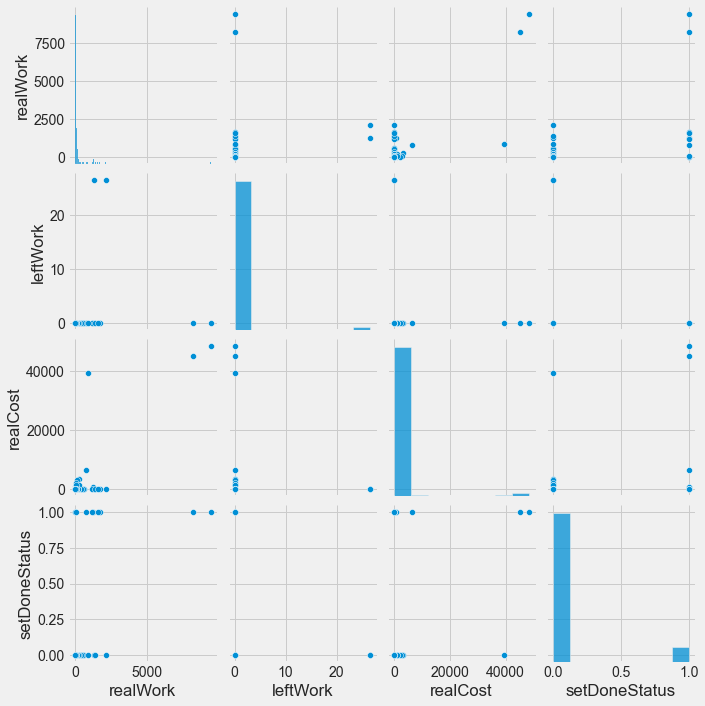

In [62]:
sns.pairplot(dataset)

C:\Users\musta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='realWork', ylabel='Density'>

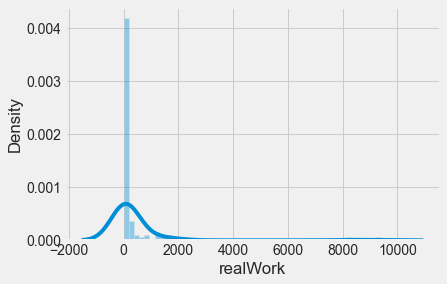

In [63]:
sns.distplot(dataset['realWork'])

C:\Users\musta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='leftWork', ylabel='Density'>

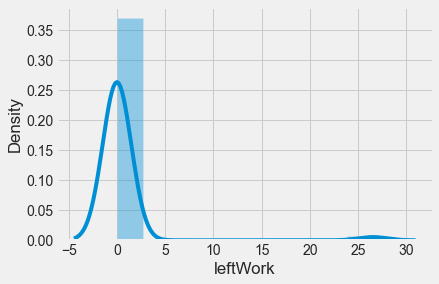

In [64]:
sns.distplot(dataset['leftWork'])

<AxesSubplot:>

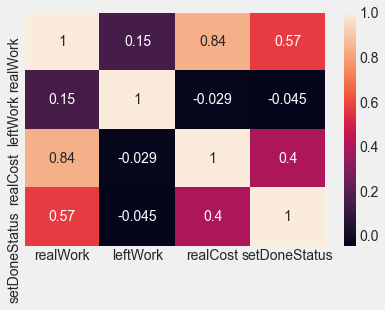

In [65]:
sns.heatmap(dataset.corr(), annot=True)

In [66]:
X = dataset[['leftWork','setDoneStatus']]
y = dataset['realWork']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [71]:
# print the intercept
print(lin_reg.intercept_)

409.11857142857144


In [72]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
leftWork,140.129655
setDoneStatus,906.190075


In [73]:
pred = lin_reg.predict(X_test)

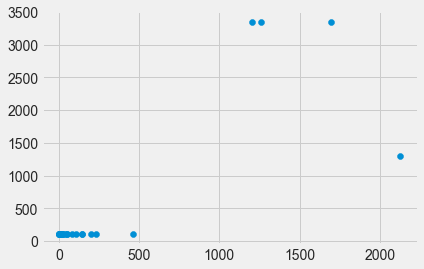

In [74]:
plt.scatter(y_test, pred)

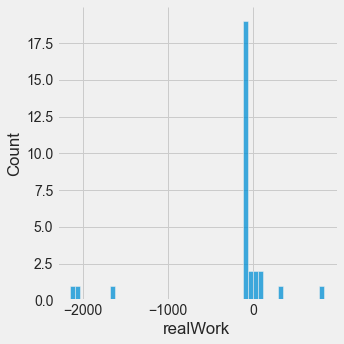

In [80]:
sns.displot((y_test - pred), bins=50);

In [76]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 309.2195502645502
MSE: 426253.9611953937
RMSE: 652.8812764932027
R2 Square -0.47080082738274465
__________________________________
Train set evaluation:
_____________________________________
MAE: 424.6419682539683
MSE: 1361954.4784720177
RMSE: 1167.028053849614
R2 Square 0.3790697740775658
__________________________________


In [77]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,309.21955,426253.961195,652.881276,-0.470801,-60.626413
